In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cat-and-dog' dataset.
Path to dataset files: /kaggle/input/cat-and-dog


In [ ]:
import os

train_Data_path = '/kaggle/input/cat-and-dog/training_set/training_set'
print(os.listdir(train_Data_path))
test_Data_path='/kaggle/input/cat-and-dog/test_set/test_set'
print(os.listdir(test_Data_path))

['dogs', 'cats']
['dogs', 'cats']


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [ ]:

#load Dataset
train_Data_path = '/kaggle/input/cat-and-dog/training_set/training_set'
test_Data_path='/kaggle/input/cat-and-dog/test_set/test_set'

train=keras.utils.image_dataset_from_directory(
    directory=train_Data_path,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
test=keras.utils.image_dataset_from_directory(
    directory=test_Data_path,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)



Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label

  train=train.map(process)


In [ ]:
# create CNN Model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train,epochs=10,validation_data=test)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 33s 107ms/step - accuracy: 0.5433 - loss: 4.8798 - val_accuracy: 0.6016 - val_loss: 0.7415
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.5976 - loss: 0.7908 - val_accuracy: 0.6555 - val_loss: 0.6639
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.6717 - loss: 0.6098 - val_accuracy: 0.7069 - val_loss: 0.5792
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.7060 - loss: 0.5821 - val_accuracy: 0.6362 - val_loss: 0.7191
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.7514 - loss: 0.5104 - val_accuracy: 0.7148 - val_loss: 0.5558
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.7936 - loss: 0.4527 - val_accuracy: 0.7533 - val_loss: 0.5231
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.8216 - loss: 0.3865 - val_accuracy: 0.7266 - val_loss: 0.5889
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.8600 - loss: 0.3160 -

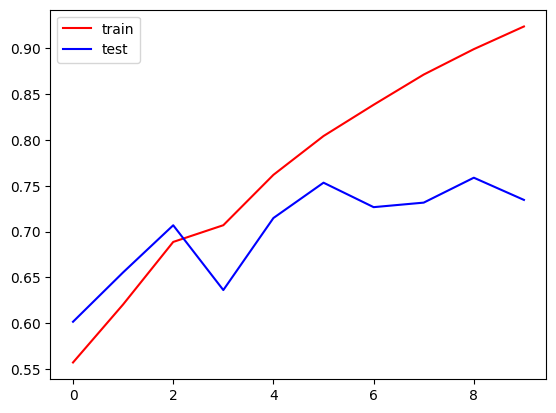

In [ ]:
#new
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

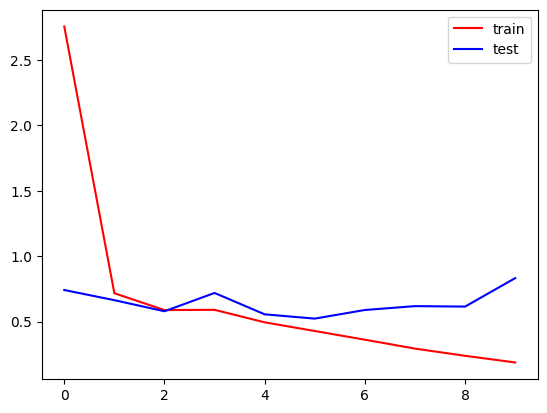

In [ ]:
#new1
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()


In [1]:
# Training accuracy
print("Training accuracy for each epoch:", history.history['accuracy'])

# Validation accuracy
print("Validation accuracy for each epoch:", history.history['val_accuracy'])

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final training accuracy: {final_train_acc:.2f}")
print(f"Final validation accuracy: {final_val_acc:.2f}")



NameError: name 'history' is not defined